In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import zscore # for scaling

from sklearn.cluster import AgglomerativeClustering # Hierarchical Clustering library

from scipy.cluster.hierarchy import cophenet, dendrogram ,linkage # observe various models
from scipy.spatial.distance import pdist # pairwise distribution

In [2]:
custData = pd.read_csv('Cust_Spend_Data.csv')
custData.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [3]:
custData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          10 non-null     int64 
 1   Name             10 non-null     object
 2   Avg_Mthly_Spend  10 non-null     int64 
 3   No_Of_Visits     10 non-null     int64 
 4   Apparel_Items    10 non-null     int64 
 5   FnV_Items        10 non-null     int64 
 6   Staples_Items    10 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 688.0+ bytes


In [4]:
custDataAttr = custData.iloc[:,2:] # taking all relevant columns
custDataAttr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [5]:
# as Avg_Mthly_Spend is in high magnitude it will influence the distance parameter a lot
# hence we will scale it as per Zscore
custDataScaled = custDataAttr.apply(zscore)
custDataScaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


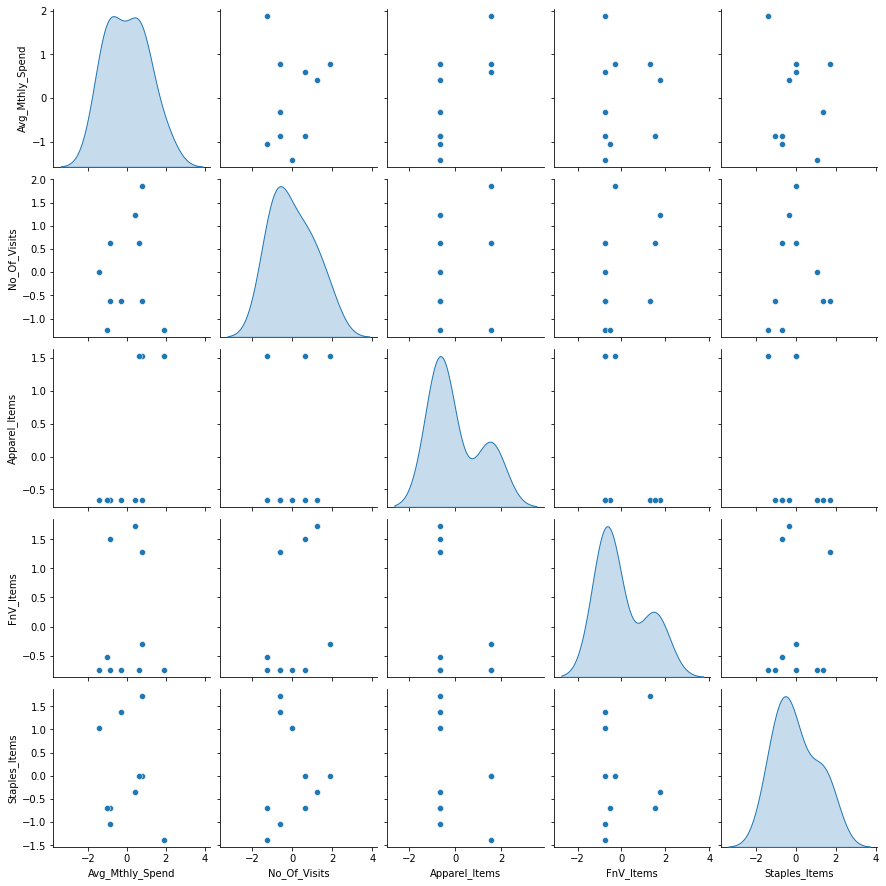

In [6]:
sns.pairplot(custDataScaled,diag_kind='kde');

In [7]:
# building model object
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [8]:
# fit the model
model.fit(custDataScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [9]:
# cluster labels for each point
custDataAttr['LABELS'] = model.labels_
custDataAttr

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,LABELS
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [10]:
custDataClust = custDataAttr.groupby(by='LABELS')
custDataClust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
LABELS,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


### `cophenet index` is a measure of the correlation between the distance of points in feature space and distance on dendrogram closer it is to 1, the better is the clustering.

In [11]:
z = linkage(y= custDataScaled, method='average',metric='euclidean')
cop_corr, cop_dist = cophenet(z, pdist(custDataScaled))
cop_corr # correlation coeff

0.8681149436293064

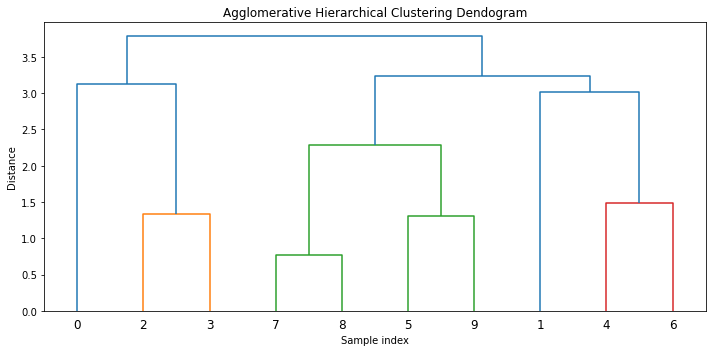

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout()

In [13]:
z = linkage(y= custDataScaled, method='complete',metric='euclidean')
cop_corr, cop_dist = cophenet(z, pdist(custDataScaled))
cop_corr # correlation coeff

0.8606955190809153

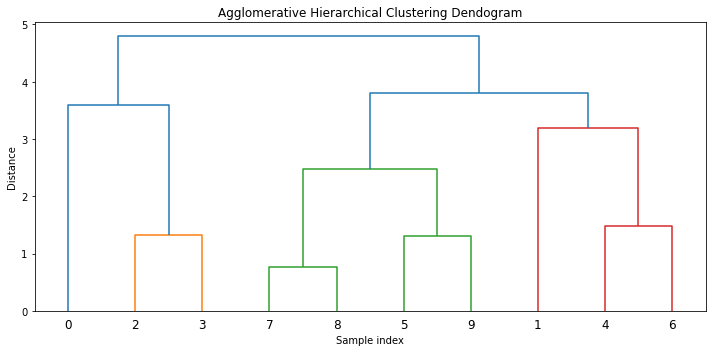

In [14]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout()

In [15]:
z = linkage(y= custDataScaled, method='ward',metric='euclidean')
cop_corr, cop_dist = cophenet(z, pdist(custDataScaled))
cop_corr # correlation coeff

0.8453818941339526

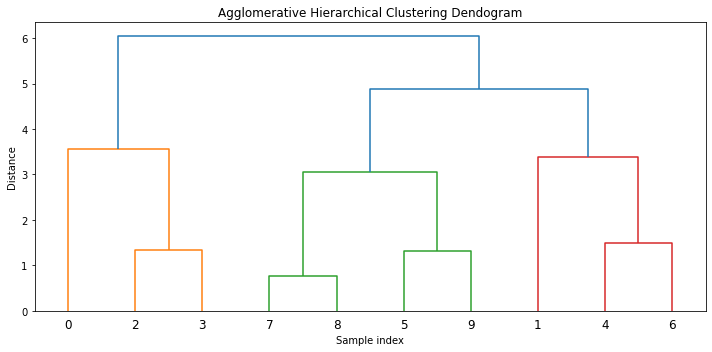

In [16]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(z)
plt.tight_layout()